[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/4_rpf_case_study.ipynb)


# Resale Price Forecasting Case Study - Part 1: Data Access and Exploration

The lecture introduced you to resale price forecasting, a task to support decision-making in the leasing business. In this tutorial, we will explore a dataset representing resale price prediction. Throughout a series of tutorials, we will go through the different 
stages of a machine learning process, from initial data exploration to sophisticated predictive modeling and insightful post-hoc analysis. This notebook is only the start of a journey. 


---

# Loading  the Resale Price Prediction Dataset
You can find the Resale Price Prediction dataset for this notebook on our Moodle page and in our GitHub repository. The Resale Price Prediction dataset focuses on laptops that have been leased and returned, aiming to predict their resale prices. The resale price is influenced by various factors, including the original retail price, depreciation, release year, screen size, hard drive size, RAM size, weight, lease duration, and battery capacity. Our final goal is to use the features to forecast resale prices. For start, however, we will explore the data to better understand its characteristics. Furthermore, data exploration facilitates learning about relevant Python libraries. For example, we will use the `pandas` library. Pandas is a widely used library for data analysis and manipulation in Python, providing powerful tools for handling structured data.



In [31]:
import pandas as pd  # load Pandas library, the go-to library for working with data sets in Python
import os

# We put the data on the web so you can download it easily
url = 'https://raw.githubusercontent.com/Humboldt-WI/IPML/main/data/resale_price_dataset.csv'

# We will use pandas read_csv method to read data right from the web
data = pd.read_csv(url)


Note that loading data from the web is not always reliable, as the data source may change or become unavailable. Therefore, we recommend downloading the dataset from our GitHub repository and saving it in a local `data` folder within your project directory. This way, you can ensure that you have a stable copy of the dataset for your analysis.
```python
import os  # library for handling file paths
# Define where on your hard drive the data file is located. You may need to adjust the path below.
url = os.path.join(os.getcwd(), 'data', 'resale_price_dataset.csv')
print(f"Try to load data from: {url}")   
# Loading the data works the same way as before. If you encounter errors, please check the file path above.
data = pd.read_csv(url) 
```

Let's first take a look at the data. To that end, we use the function `.head()`, which creates a preview of the data.

In [32]:
# The head function is used to display the first few rows of the dataset after it has been loaded into a pandas DataFrame format
data.head(n=5)


,Brand,Model,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Industry,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
0,Crest,Elevation Elite,2016,15,512,16,1150,2699,Automotive and Transportation,60,63,87.90,751
1,Crest,Elevation Elite,2016,15,512,16,1150,2719,Healthcare,6,5,95.59,2599
2,Crest,Elevation Elite,2016,15,512,16,1150,2759,Automotive and Transportation,24,27,95.05,1358
3,Crest,Elevation Elite,2016,15,512,16,1150,2639,Automotive and Transportation,36,31,94.66,1166
4,Crest,Elevation Elite,2016,15,512,16,1150,2659,Agriculture and Farming,12,10,89.12,1915


# Descriptive Statistics
The pandas library offers various functions to compute descriptive statistics, which help us summarize and understand the main characteristics of our dataset. Descriptive statistics provide insights into the distribution, central tendency, and variability of the data, allowing us to quickly grasp its overall structure. Furthermore, the pandas library offers functions to understand the data types and identify missing values in our dataset.

The relevant functions we will use for our first examination of the data are `pd.DataFrame.info()` and `pd.DataFrame.describe()`.

The `pd.DataFrame.info()` function reveals the high-level structure of our data table. Note that pandas uses the term *data frame* to refer to a table. The `pd.DataFrame.info()` function provides information on the number of entries (eg, rows), the data types of each column, and the number of missing values if any. Understanding these details is crucial for further analysis of the data. 

The `pd.DataFrame.describe()` function computes a suite of summary statistics for each column in our dataset. Examples include the average of a column or its standard deviation. 

But why are these functions essential? Both ```info()``` and ```describe()``` help us establish a foundational understanding of our dataset's distribution, scale, and tendencies. While ```info()``` gives us a structural overview, ```describe()``` takes us a step further into the statistical nature of each column. By noting aspects like the mean, standard deviation, and minimum/maxium values, we can swiftly detect outliers, identify patterns, and formulate hypotheses for further investigation.

Together, these methods serve as our initial checkpoint, ensuring that we're not only aware of the dataset's composition but also acquainted with its statistical properties. 

In [33]:
# Obtain information about the structure and
# characteristics of the dataset using the 
# .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             5000 non-null   object 
 1   Model                             5000 non-null   object 
 2   Release year                      5000 non-null   int64  
 3   Screen size (inches)              5000 non-null   int64  
 4   Hard drive size (GB)              5000 non-null   int64  
 5   RAM size (GB)                     5000 non-null   int64  
 6   Weight (grams)                    5000 non-null   int64  
 7   Retail price                      5000 non-null   int64  
 8   Industry                          5000 non-null   object 
 9   Contract Lease Duration (months)  5000 non-null   int64  
 10  Actual Lease Duration (months)    5000 non-null   int64  
 11  Battery capacity (%)              5000 non-null   float64
 12  Observ

In [34]:
# Count, Mean, std, min max,  
# and quartiles for numeric columns
data.describe()

,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2017.121200,14.344000,466.772000,9.396800,1043.571200,2252.572000,28.069200,27.521800,89.529922,1199.526800
std,0.956605,2.501223,333.350319,4.999155,198.075846,991.656229,16.039285,16.273122,6.047601,649.126955
min,2015.000000,11.000000,128.000000,4.000000,692.000000,649.000000,6.000000,3.000000,53.960000,0.000000
25%,2017.000000,12.000000,256.000000,4.000000,892.000000,1509.000000,12.000000,12.000000,86.267500,725.000000
50%,2017.000000,14.000000,256.000000,8.000000,1010.000000,2019.000000,24.000000,25.000000,90.760000,1069.000000
75%,2018.000000,17.000000,512.000000,16.000000,1188.000000,2919.000000,36.000000,38.000000,93.982500,1529.000000
max,2018.000000,19.000000,1028.000000,16.000000,1530.000000,5719.000000,60.000000,75.000000,99.470000,4550.000000


# Data selection
Pandas dataframes work similar to Python lists. You can select data items using indexing. Given that a dataframe is a two-dimensional data structure, we need to distinguish between selecting rows or columns. 

The easist way to index a dataframe is to use the column name. For example, to select the column `resale_price`, we can use the following code:
```python   
resale_prices = data['Observed resale_price']
``` 

In [35]:
# Extract the column 'Observed resale_price' from the dataframe
resale_prices = data['Observed resale price']
resale_prices

0        751
1       2599
2       1358
3       1166
4       1915
        ... 
4995    1334
4996     988
4997    1967
4998     879
4999    1776
Name: Observed resale price, Length: 5000, dtype: int64

In [36]:
# Select multiple columns by passing a list of column names
cols = ['Model', 'RAM size (GB)', 'Retail price']
subset = data[cols]
subset.head()

,Model,RAM size (GB),Retail price
0,Elevation Elite,16,2699
1,Elevation Elite,16,2719
2,Elevation Elite,16,2759
3,Elevation Elite,16,2639
4,Elevation Elite,16,2659


## Advanced indexing using .loc and .iloc
The functions `.loc` and `.iloc` provide more advanced indexing capabilities. The `.loc` function allows you to select data based on labels, while `.iloc` allows you to select data based on integer positions. 

In [37]:
# Index first 3 rows, and a subset of columns
subset = data.loc[0:3, ['Model', 'RAM size (GB)']]
subset

,Model,RAM size (GB)
0,Elevation Elite,16
1,Elevation Elite,16
2,Elevation Elite,16
3,Elevation Elite,16


In [38]:
# All columns of row 13
subset = data.loc[13, :]
subset

Brand                                         Crest
Model                               Elevation Elite
Release year                                   2016
Screen size (inches)                             15
Hard drive size (GB)                            512
RAM size (GB)                                    16
Weight (grams)                                 1150
Retail price                                   2709
Industry                                  Education
Contract Lease Duration (months)                 36
Actual Lease Duration (months)                   28
Battery capacity (%)                          85.27
Observed resale price                          1146
Name: 13, dtype: object

The above examples using `.loc[]` would not facilitate selecting columns based on their integer positions. For that, we would use `.iloc[]`. For example, to select all rows of the 1st, 3rd, and 7th columns, we could write:
```python   
subset = data.iloc[:, [1, 3, 7]]    
```

In [39]:
# Index all rows,
# and column 1, 3, and 7
subset = data.iloc[:, [1, 3, 7]]
subset

,Model,Screen size (inches),Retail price
0,Elevation Elite,15,2699
1,Elevation Elite,15,2719
2,Elevation Elite,15,2759
3,Elevation Elite,15,2639
4,Elevation Elite,15,2659
...,...,...,...
4995,WindRider W2,15,3989
4996,WindRider W2,13,2859
4997,WindRider W2,13,2859
4998,WindRider W2,13,2829


The function `.loc` and `.iloc` may look similar. Note an import difference. The `.loc` function uses the actual labels of the rows and columns, while `.iloc` uses their integer positions. For columns, it is normal to distinguish between the two as column names (typically) consist of text. Rows, on the other hand, may not have more than a consecutive number as row index. This is also what you see in the above example. In this case - and only in this case - the row index and the integer position are identical.
```python
# Index first 5 rows and all columns
subset1 = data.iloc[0:5, :]
# Do the same using .loc
subset2 = data.loc[0:4, :]
```


In [40]:
# Index first 5 rows and the second column
subset1 = data.iloc[0:5, 1]
subset1

0    Elevation Elite
1    Elevation Elite
2    Elevation Elite
3    Elevation Elite
4    Elevation Elite
Name: Model, dtype: object

In [41]:
# Index first 5 rows and the second column
subset2 = data.loc[0:4, 'Model']
subset2


0    Elevation Elite
1    Elevation Elite
2    Elevation Elite
3    Elevation Elite
4    Elevation Elite
Name: Model, dtype: object

## Exercises
Drawing of the previous examples on how to index dataframes using `.loc` and `.iloc`, you can work on the following exercises to advance your understanding of the Pandas library and our dataset. To avoid accidental modification of the original data, we first create a copy of the data frame and and recommend that you use the variable `df` for all exercise tasks. If, at some points, you want to restore the original data, simply execute:
```python
df = data.copy()
```



In [42]:
df = data.copy()  # create a copy of the original data frame and store it in the variable df

### Exercise 1 – Getting to Know the Data Frame

1. Display the first 5 rows of `df`.
2. Check how many rows and columns the data frame has.
3. Print the list of column names.
4. Select one column of your choice as a **Series** and then the same column as a **DataFrame**.

*Hints:*
- Use `df.head()`, `df.shape`, and `df.columns`.
- To select a column as a Series: `df["some_column"]`.
- To select a column as a DataFrame: `df[["some_column"]]`.



In [43]:
# Your solution to the exercise task:

### Exercise 2 – Row Selection with `.iloc`

1. Select the first 10 rows of `df` using `.iloc`.
2. Select rows 10 to 19 (i.e., the 11th to 20th rows) using `.iloc`.
3. Select the last row of `df` using `.iloc`.

*Hints:*
- `.iloc` is **purely position-based indexing**: `.iloc[rows, columns]`.
- You can slice rows with `df.iloc[start:stop]`.
- Negative indices work as in Python lists, e.g. `df.iloc[-1]` for the last row.

In [44]:
# Your solution to the exercise task:

### Exercise 3 – Column and Row Subsets with `.iloc`

1. Using `.iloc`, select:
   - The first 5 rows and the first 3 columns.
   - Every second row from the first 20 rows (i.e., row positions 0, 2, 4, …, 18) and the first 2 columns.
2. Store one of these subsets in a variable called `df_small` and display it.

*Hints:*
- General pattern: `df.iloc[row_slice, column_slice]`.
- You can use step sizes in slices: `df.iloc[0:20:2]` selects every 2nd row from position 0 to 19.

In [45]:
# Your solution to the exercise task:

### Exercise 4 – Label-based Indexing with `.loc`

1. Inspect the **index** of `df` using `df.index`.
2. Store the first three index labels in a variable, e.g.  
   `first_labels = df.index[:3]`.
3. Use `.loc` to select the rows with these three index labels.
4. Use `.loc` to select **two columns of your choice** for these same rows.

*Hints:*
- `.loc` uses **labels**, not positions: `.loc[row_labels, column_labels]`.
- You can pass lists of labels: `df.loc[["label1", "label2"], ["colA", "colB"]]`.

In [46]:
# Your solution to the exercise task:

### Exercise 5 – Mixing `.loc` and `.iloc`

1. Using `.iloc`, select any **single row** and store it in a variable, e.g. `row_pos = 10`.
2. Use `.iloc` to view that row.
3. Now take the **index label** of that row (e.g. `row_label = df.index[row_pos]`) and use `.loc` to retrieve the same row.
4. Compare the results from `.iloc` and `.loc`. Are they identical?

*Hints:*
- `.iloc[row_pos]` → uses integer position.
- `.loc[row_label]` → uses the label from the index.
- This exercise is about understanding that the **position** and the **label** are conceptually different (even if they sometimes coincide).

In [47]:
# Your solution to the exercise task:

### Exercise 6 – Understanding `.loc` vs `.iloc` Through Summary Statistics

This exercise deepens your understanding of the difference between **position-based** indexing (`.iloc`) and **label-based** indexing (`.loc`) by working with summary statistics.

1. Use `df.describe()` to compute summary statistics for all numeric columns.  
   Store the result in a variable called `summary`.

2. Display `summary` to inspect the index labels it uses (e.g., `"count"`, `"mean"`, `"25%"`, etc.).

3. Extract the **first quartile row** (the `"25%"` row) from `summary` **using `.loc`**.

4. Try to extract the same row using `.iloc`.  
   - Before doing so, inspect the index of `summary` (via `summary.index`) to find the correct **position** of the `"25%"` row.

5. Compare both results. Are they identical?  
   Briefly explain in a markdown cell why the following statement is true:  
   > *“.loc retrieves values using **labels**, while .iloc retrieves values using **integer positions** — even if the labels look like numbers.”*

*Hints:*
- Step 3 works like: `summary.loc["25%"]`.
- Step 4 requires something like: `summary.iloc[position]`, where `position` is the integer index corresponding to `"25%"`.
- Use `summary.index` to inspect the index labels and determine their order.

In [48]:
# Your solution to the exercise task:

### Exercise 7 – Introducing Boolean (Logical) Indexing

In this exercise, you will filter rows using **conditions** (logical indexing), which we have not covered in detail in the lecture.

1. Use `df.select_dtypes` to find at least one **numeric column**.
2. Choose one numeric column, say `col = "..."`.
3. Compute the median of this column.
4. Create a **boolean mask** that is `True` for rows where the value in `col` is **greater than the median**.
5. Use this mask to filter `df` so that you only keep rows where the value in `col` is above the median.

*Hints:*
- A boolean mask is a Series of True/False values, e.g.  
  `mask = df[col] > df[col].median()`.
- You can use it to filter the data frame: `df_filtered = df[mask]`.
- Check `df_filtered.head()` to see whether the filtering worked.


In [49]:
# Your solution to the exercise task:

### Exercise 8 – Combining Multiple Conditions (Logical AND / OR)

Now extend boolean indexing to use **two conditions**.

1. Again, pick two numeric columns, for example `col1` and `col2`.
2. Create a mask for `col1` being **above its median**.
3. Create a mask for `col2` being **below its 75% quantile**.
4. Combine these two masks using a **logical AND** (`&`) so that only rows satisfying *both* conditions remain.
5. Create another combined mask using a **logical OR** (`|`) so that rows satisfying *at least one* of the two conditions remain.
6. For each case, filter `df` and check how many rows you get.

*Hints:*
- Remember: parentheses are important!  
  `mask = (df[col1] > df[col1].median()) & (df[col2] < df[col2].quantile(0.75))`
- Use `.shape` or `len(df_filtered)` to see how many rows are left.

In [50]:
# Your solution to the exercise task:

### Exercise 9 – Creating New Columns Using Indexing

1. Choose a numeric column that represents some kind of **price** or quantity.
2. Compute its median and store it in a variable, e.g. `price_median`.
3. Create a new boolean column `is_expensive` that is `True` if the price is above the median and `False` otherwise.
4. Verify that the new column has been added by displaying the first 10 rows of `df` with `df.head(10)`.
5. Use boolean indexing with this new column to create a subset `df_expensive` that only contains "expensive" rows.

*Hints:*
- You can assign new columns like this:  
  `df["new_column"] = ...`
- Boolean columns work perfectly as masks:  
  `df_expensive = df[df["is_expensive"]]`.

In [51]:
# Your solution to the exercise task:

### Exercise 10 – Using `.loc` to Update Values Conditionally

1. Reuse the `is_expensive` column from the previous exercise.
2. Create another new column, e.g. `category`, and initialize it with the string `"normal"` for all rows.
3. Using `.loc` and a boolean condition, set `category` to `"expensive"` for all rows where `is_expensive` is `True`.
4. Check a few rows of `df` to confirm that the update worked.
5. (Optional) Count how many rows fall into each category using `value_counts()`.

*Hints:*
- Pattern for conditional update:  
  `df.loc[condition, "column_name"] = new_value`
- Example (adapt to your column names):  
  `df.loc[df["is_expensive"], "category"] = "expensive"`

In [52]:
# Your solution to the exercise task:

# Data visualisation

In this subsection, we take a graphical approach to understand our Resale Price Prediction dataset. For this purpose we first load the two most prominent libraries for data visualization – `Matplotlib` and `Seaborn`.

**Matplotlib**: A foundational plotting library, Matplotlib is the granddaddy of Python visualization tools. It offers immense flexibility and allows us to create a wide variety of charts and plots with fine-grained control over every aspect of the visuals. Whether it's histograms, scatter plots, or line charts, Matplotlib provides the functionalities to craft them all with detailed customizations.

**Seaborn**: Built on top of Matplotlib, Seaborn simplifies many visual tasks, making sophisticated plots accessible and understandable. It comes with built-in themes and color palettes that enhance the aesthetics of our visualizations. Seaborn is particularly adept at handling statistical graphics, making it easier to visualize complex datasets with just a few lines of code.

In [53]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Visualizations for individual columns
Visualizations of individual table columns depend on the type of data stored in that columns. We distinguish between numerical and categorical data. For numerical columns, it is common practice to analyze the distribution of the variable using *histograms* or *boxplots*.

A *histogram* displays the distribution of a numerical variable by dividing the data into bins and counting the number of observations in each bin. This helps us understand the spread and central tendency of the data.

A *boxplot*, on the other hand, provides a summary of the distribution of a numerical variable through its quartiles. It highlights the median, interquartile range, and potential outliers in the data.

For categorical columns, *bar charts* are often used to visualize the frequency of each category.



### Histogram
The following code creates a histogram for the column `Observed resale price`, which contains numerical data representing the resale prices of laptops. 
```python
# Plot histogram for the 'Observed resale_price' column
plt.hist(data['Observed resale price'], edgecolor='black')
plt.title('Histogram of Observed Resale Price')
plt.xlabel('Resale Price')  
plt.ylabel('Frequency')
plt.show()
``` 

In [54]:
# Draw on the above example to create a histogram for the 
# 'Observed resale price' column



Above, we use the library `Matplotlib`, which you can think of as a
standard library for visualization. It offers much flexibility and facilitates creating various types of plots.

In the scope of *data science* or *machine learning*, we routinely use a set of standard visualizations for data analysis, including the histogram. The library `seaborn` provides access to many of these plots through an easy-to-use interface. For example, creating the same histogram as before using `seaborn`, we would only need the following code: 
```python
# Plot histogram using seaborn  
sns.histplot(data=data, x='Observed resale price')
plt.title('Histogram of Observed Resale Price')
plt.show()
```

In [55]:
# Also try out the seaborn version of the histogram


### Boxplot
The creation of a boxplot follows a similar structure as the histogram. Using `Matplotlib`, we can create a boxplot for the `Observed resale price` column with the following code:
```python   
plt.boxplot(data['Observed resale price'], vert=True, patch_artist=True)
plt.title('Boxplot of Observed Resale Price')   
plt.ylabel('Resale Price')
plt.show()
```
Alternatively, we can use `seaborn` to create the same boxplot with less code:
```python   
sns.boxplot(data=data, x='Observed resale price')
plt.title('Boxplot of Observed Resale Price')
plt.show()
```
Considering the `seaborn` example, note how we specify the data frame and the column name directly within the `sns.boxplot()` function. More specifically, we use the function argument `x` to indicate that we want to plot the values of the `Observed resale price` column on the x-axis. To rotate the boxplot to be vertical instead of horizontal, you can exchange the `x` and use the argument `y` instead. Give it a try!

In [56]:
# Code to create a boxplot for the 'Observed resale price' column


### Countplot
A *countplot* is a type of bar chart that displays the frequency of each category in a categorical variable. It is particularly useful for visualizing the distribution of categorical data and identifying the most common categories. Here's how you can create a countplot for a categorical column, such as `Brand`, using our two plotting libraries:
```python
# Using Matplotlib
brand_counts = data['Brand'].value_counts()
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Countplot of Brand')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()
``` 
```python   
# Using Seaborn
sns.countplot(data=data, x='Brand') 
plt.title('Countplot of Brand')
plt.show()
```


In [57]:
# Code to create countplot for the 'Brand' column



These examples hint at the advantages of using `seaborn` for standard visualizations, as it often requires less code and provides a more straightforward interface for creating common plots. For example, the `sns.countplot()` function directly handles the counting of categories, while in the `Matplotlib` example, we first need to compute the counts using `value_counts()` before plotting. We could emphasize this point further by creating a *grouped countplot*. With our data, we could, for example, examine the frequency of different laptop brands (column `Brand`) across levels of another variable, such as, `Release year`. This is easily done using `seaborn`, which supports an argument `hue` for grouping purposes. Creating the same kind of visualization using `Matplotlib` requires a lot more code and is, therefore, not demonstrated here. 
```python
# Using Seaborn to create a stacked countplot
sns.countplot(data=data, x='Brand', hue='Release year')
plt.title('Stacked Countplot of Brand by Release year')
plt.show()
```
> Hint: if you try out the above code, you may notice that the `Brand` column has many unique values. This can lead to a cluttered and hard-to-read plot. To improve readability, you could use logical indexing to first create a new dataframe containing only a handful of brands and to then create the grouped plot for this filtered dataframe. Exercise 7 and 8 on Pandas indexing provide the necessary background.



In [58]:
# Code to create a grouped countplot for the 'Brand' column across 'Release years'


### Exercise
The previous examples have illustrated standard visualizations for individual columns. Commonly, we need to examine all columns in a dataset. From a programming perspective, we could achieve this by using loops. Here is your exercise task:
1. Write a `for` loop that iterates over all columns of the dataset. You can access the column names using `data.columns`
2. Inside the loop, check the data type of the current column. Note the hints belows on how to do this
  a) If the column is of numerical type, plot its distribution using a histogram
  b) If the column is of categorical type, plot its distribution using a countplot

*Hints:*
- We suggest you use the `seaborn` library for creating the plots, as it requires less code. However, the choice is yours.
- To check a column's data type, you can use `data[column_name].dtype`.
- Numerical data types typically include `int64` and `float64`, while categorical data types are often represented as `object` or `category`. 
- Hence, you can use the statement  `data[column_name].dtype in ['int64', 'float64']` to check for numerical columns.
- Likewise, you can check for categorical columns with `data[column_name].dtype in ['object', 'category']`.

In [59]:
# Code for the visualization exercise:

# Visualizations for relationships between columns
Strictly speaking, the previous example of a grouped countplot already visualizes relationships between two columns – *Brand* and *Release year*. In this section, we will focus more explicitly on visualizations that analyze relationships between multiple columns. In this scope, we begin with the most obvious example of a scatter plot, showing the association between two numerical columns. Next, we consider correlation, a measure summarizing the linear association between two columns in a single number. We will compute a *correlation matrix*, which consists of the pairwise correlations of all numerical columns in the data. Lastly, we exemplify the violin plot, a less common but powerful way to analyze the distribution of a numerical variable across differt levels of up to two categorical variables. 


## Scatter Plot
A *scatter plot* is a graphical representation that displays the relationship between two numerical variables. Each point on the scatter plot represents an observation in the dataset, with its position determined by the values of the two variables being compared. Scatter plots are particularly useful for identifying patterns, trends, and potential correlations between the variables. We can create scatter plots using both, `Matplotlib` and `Seaborn`. Below, we provide examples for both libraries, visualizing the relationship between the columns `Observed resale price` and `Original price`.
```python
# Using Matplotlib to create a scatter plot
plt.scatter(data['Retail price'], data['Observed resale price'])
plt.title('Scatter Plot of Observed Resale Price vs original Retail Price')
plt.xlabel('Original Price')
plt.ylabel('Observed Resale Price')
plt.show()
``` 
```python
# Using Seaborn to create a scatter plot
sns.scatterplot(data=data, x='Retail price', y='Observed resale price')
plt.title('Scatter Plot of Observed Resale Price vs Original Price')
plt.show()      
```


In [ ]:
# Code to a scatter plot showing the relationship between 'Original price' and 'Observed resale price' or other columns

Our choice of the two columns `Retail price` and `Observed resale price` is natural given the context of the dataset, reselling used items in the second-hand market. However, we may wish to also examine the association between other columns. Speaking about other columns, it would be useful to obtain a visualization of *all the main patterns* in the data with a single function call. While no function can - or should - promise to reveal *all main patters*, the `pairplot()` function from `seaborn` is a useful tool for data exploration and obtaining some first-level insights into a dataset. It creates a grid of scatter plots for each pair of numerical variables, visualizing their pairwise relationships. Additionally, it includes histograms or density plots along the diagonal to show the distribution of each individual variable. With these characteristics, `pairplot()` provides a comprehensive visualization of the numerical columns of a dataset and is very easy to use. 
>Note that creating a `pairplot` (i.e., executing the next cell) will take a bit of time. 

In [ ]:
# Visualizing the entire dataset with pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(data)
plt.show()

## Correlation
Next, we consider the correlation between table columns. Recall that *correlation* is a measure for much two numerical random variables (e.g., table columns) are linearly related. To compute the pairwise correlation between all table columns, we can use the `corr()` function, which Pandas provides. Afterwards, we can visualize all the pairwise correlations as a headmap for easy inspection. To achieve this, we will use the `heatmap` function from `seaborn`. 


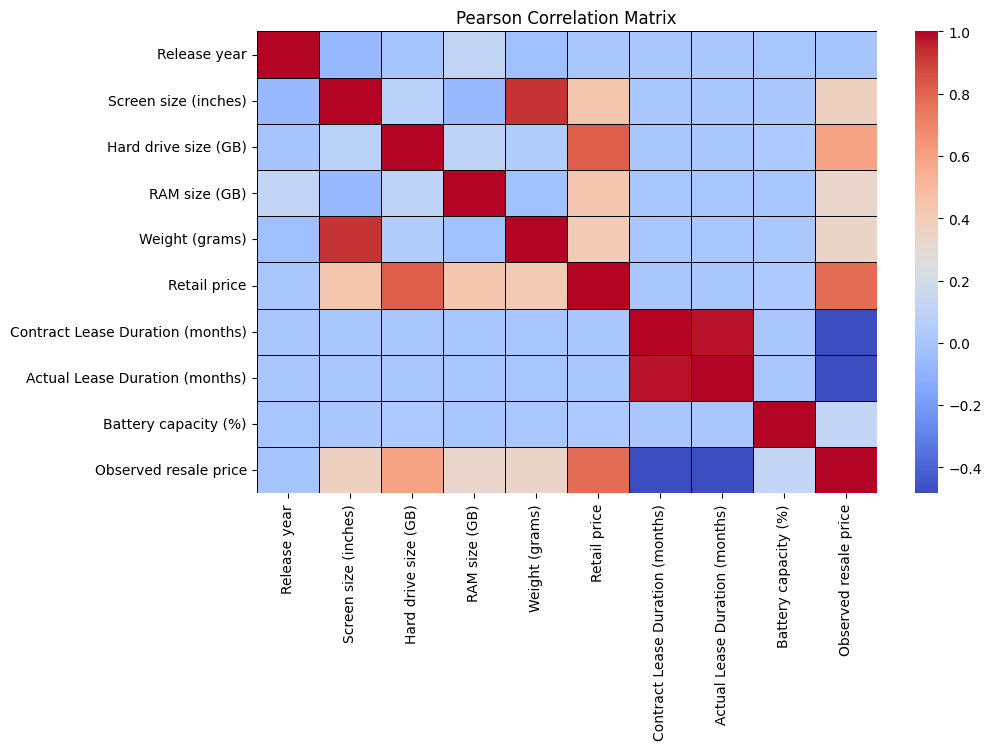

In [76]:
import numpy as np
# Compute Pearson correlation between all numerical columns of the dataset
rho = data.corr(method='pearson', numeric_only=True)  # we must explicitly exclude non-numeric columns
# heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data=rho, cmap='coolwarm', fmt=".2f", linecolor='black', linewidth=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

## Violin Plots
Violin plots are a combination of box plots and kernel density plots. They provide a more detailed view of the distribution of numerical features across different categories. Arguably, this type of visualization is less common. However, it can be useful and so we complete this part with a few demos.

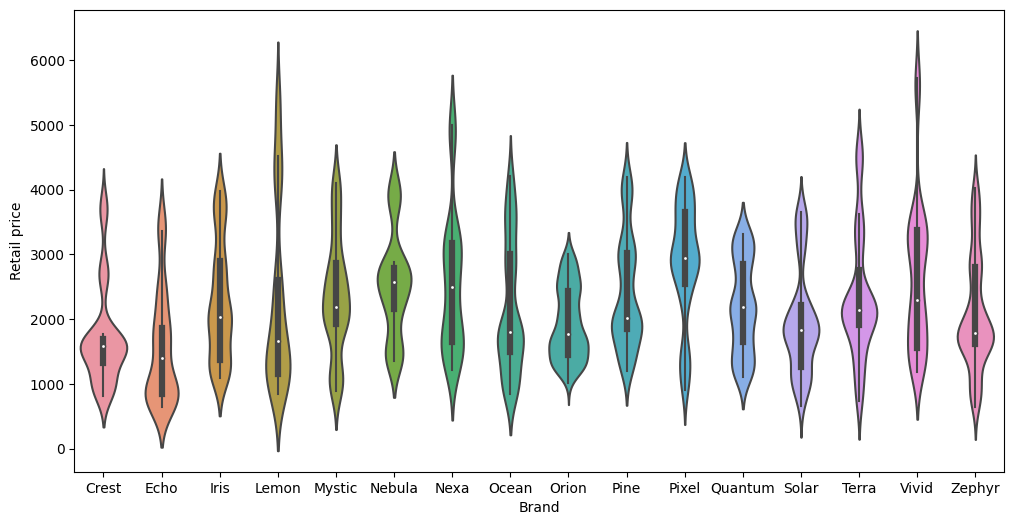

In [86]:
# Violin plot of the feature LOAN grouped by the feature JOB
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Brand', y='Retail price', inner='box') 
plt.show()

Above, we promised that the violin plot can handle up to two categorical variables. To demonstrate this, we first need a new categorical variable with no more than two levels, that is a dummy variable. We create a dummy variable indicating whether a notebook's resale price is above its median value. Then, the following code creates a violin plot for retail prices, grouped by the categorical column *Brand*, where we split each "violin" into two halfs, showing the retail price distribution for notebooks with resale prices above and below their median, respectively. Do not think too much into this visualization. It's main purpose is to showcase a violin plot with 3 dimensions. 
```python

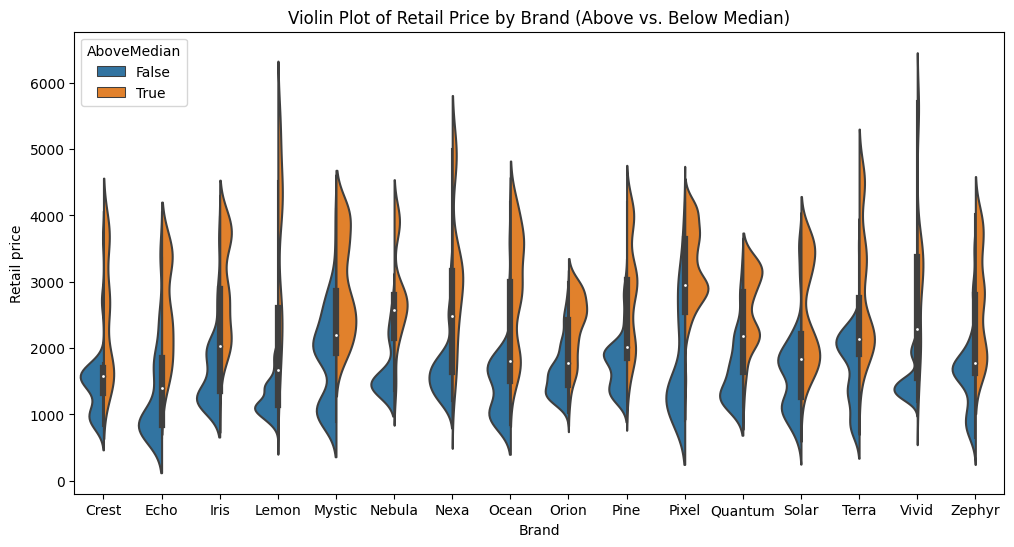

In [99]:
# Add a dummy column to the dataset (needed for our 3D visualization plot)
data["AboveMedian"] = data["Observed resale price"] > data["Observed resale price"].median()

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=data,
    x='Brand',
    y='Retail price',
    hue='AboveMedian',
    split=True,
    inner='box'
)
plt.title("Violin Plot of Retail Price by Brand (Above vs. Below Median)")
plt.show()